# AGEB Locator
We will use the *geopandas* module to open the shapefiles to access the variables in the file and the polygons of the AGEBs. We will use the AGEBs from Culiacán city, but you can use the shapefile from another region. The shapefile and the data is the folder 'AGEB Culiacán'.

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Read shapefile in folder AGEB Urbano
gdf = gpd.read_file('AGEBs/2023_25006_A09112024_0057.shp')
gdf.head()

,GUID,CVE_GEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,EDICION,VERSION,OID,geometry
0,153762312,2500600014721,25,006,0001,4721,2023,1,1,"POLYGON ((-107.42877 24.75074, -107.42865 24.7..."
1,153762779,2500600016569,25,006,0001,6569,2023,1,2,"POLYGON ((-107.42879 24.85293, -107.42876 24.8..."
2,153762716,2500600018480,25,006,0001,8480,2023,1,3,"POLYGON ((-107.42996 24.84531, -107.42952 24.8..."
3,153762768,2500600019296,25,006,0001,9296,2023,1,4,"POLYGON ((-107.42997 24.84861, -107.43027 24.8..."
4,153762353,2500600015804,25,006,0001,5804,2023,1,5,"POLYGON ((-107.4302 24.82521, -107.43062 24.82..."


<Axes: >

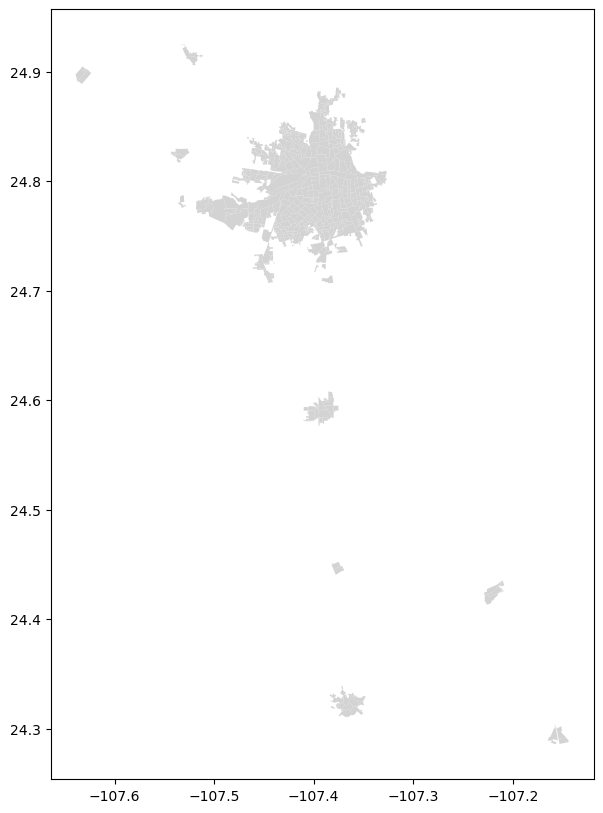

In [2]:
# Plot the polygons
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='lightgrey')

We obtained a sample of 100 nanostores from DENUE (SCIAN 461110). We are going to locate the AGEB for each nanostore. The file Nanostores_DENUE.csv cointains the sample. This dataset has already AGEB, but we are going to use it the check out our code.

In [3]:
# Read Nanostore information
df0 = pd.read_csv('Nanostores_location.csv')
df = df0[['Nombre de la Unidad Económica', 'Nombre de asentamiento humano', 'Código Postal', 'Área geoestadística básica ', 'Latitud', 'Longitud']]
df.head()

,Nombre de la Unidad Económica,Nombre de asentamiento humano,Código Postal,Área geoestadística básica,Latitud,Longitud
0,TIENDA DE ABARROTES,VILLA SATELITE,80088,1604,24.807097,-107.357217
1,ABARROTES BARELAS,HUIZACHES,80298,3973,24.757707,-107.384245
2,ABARROTES MELY,LOMAS DE RODRIGUERA,80019,3047,24.870104,-107.391630
3,ABARROTES EVA,INFONAVIT HUMAYA,80020,3992,24.822760,-107.418068
4,ABARROTES LETY,INDUSTRIAL EL PALMITO,80160,413,24.779739,-107.431670


In [4]:
# Use geopandas to create a GeoDataFrame of the location of nanostores
gdf2 = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitud, df.Latitud))
gdf2.crs = gdf.crs
gdf2.head()

,Nombre de la Unidad Económica,Nombre de asentamiento humano,Código Postal,Área geoestadística básica,Latitud,Longitud,geometry
0,TIENDA DE ABARROTES,VILLA SATELITE,80088,1604,24.807097,-107.357217,POINT (-107.35722 24.8071)
1,ABARROTES BARELAS,HUIZACHES,80298,3973,24.757707,-107.384245,POINT (-107.38425 24.75771)
2,ABARROTES MELY,LOMAS DE RODRIGUERA,80019,3047,24.870104,-107.391630,POINT (-107.39163 24.8701)
3,ABARROTES EVA,INFONAVIT HUMAYA,80020,3992,24.822760,-107.418068,POINT (-107.41807 24.82276)
4,ABARROTES LETY,INDUSTRIAL EL PALMITO,80160,413,24.779739,-107.431670,POINT (-107.43167 24.77974)


<Axes: >

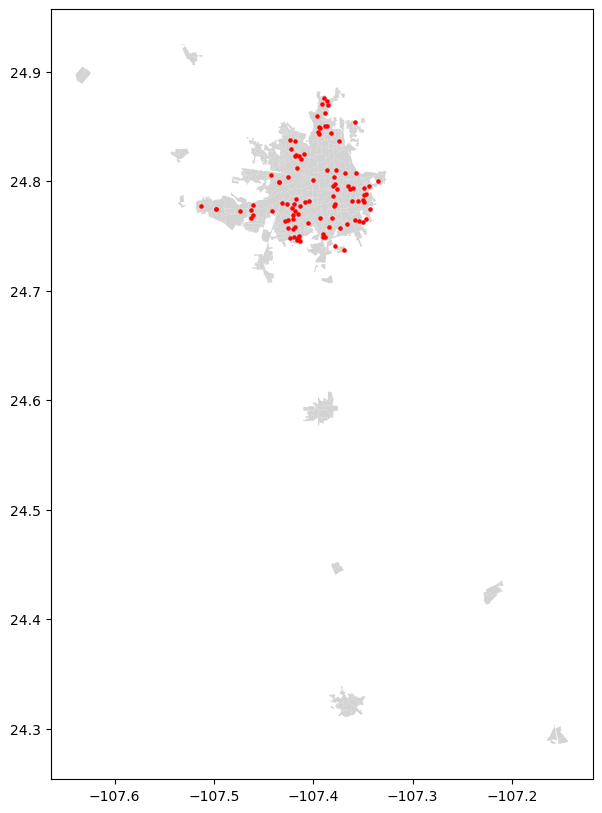

In [5]:
# Plot the nanostores with the polygons
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='lightgrey')
gdf2.plot(ax=ax, color='red', markersize=5)

In [6]:
# Find the polygon that contains each GPS coordinate and add CVE_AGEB to gdf2
gdf2['poly_idx'] = None
gdf2['CVE_AGEB'] = None
for idx, point in gdf2.iterrows():
    for poly_idx, poly in gdf.iterrows():
        if poly.geometry.contains(point.geometry):
            gdf2.at[idx, 'poly_idx'] = poly_idx
            gdf2.at[idx, 'CVE_AGEB'] = poly.CVE_AGEB
            break
gdf2.head()

,Nombre de la Unidad Económica,Nombre de asentamiento humano,Código Postal,Área geoestadística básica,Latitud,Longitud,geometry,poly_idx,CVE_AGEB
0,TIENDA DE ABARROTES,VILLA SATELITE,80088,1604,24.807097,-107.357217,POINT (-107.35722 24.8071),180,1604
1,ABARROTES BARELAS,HUIZACHES,80298,3973,24.757707,-107.384245,POINT (-107.38425 24.75771),603,3973
2,ABARROTES MELY,LOMAS DE RODRIGUERA,80019,3047,24.870104,-107.391630,POINT (-107.39163 24.8701),252,3047
3,ABARROTES EVA,INFONAVIT HUMAYA,80020,3992,24.822760,-107.418068,POINT (-107.41807 24.82276),317,3992
4,ABARROTES LETY,INDUSTRIAL EL PALMITO,80160,413,24.779739,-107.431670,POINT (-107.43167 24.77974),127,0413


We can plot the polygons and the puntual locations to visualize the the nanostores location and its polygons.

<Axes: >

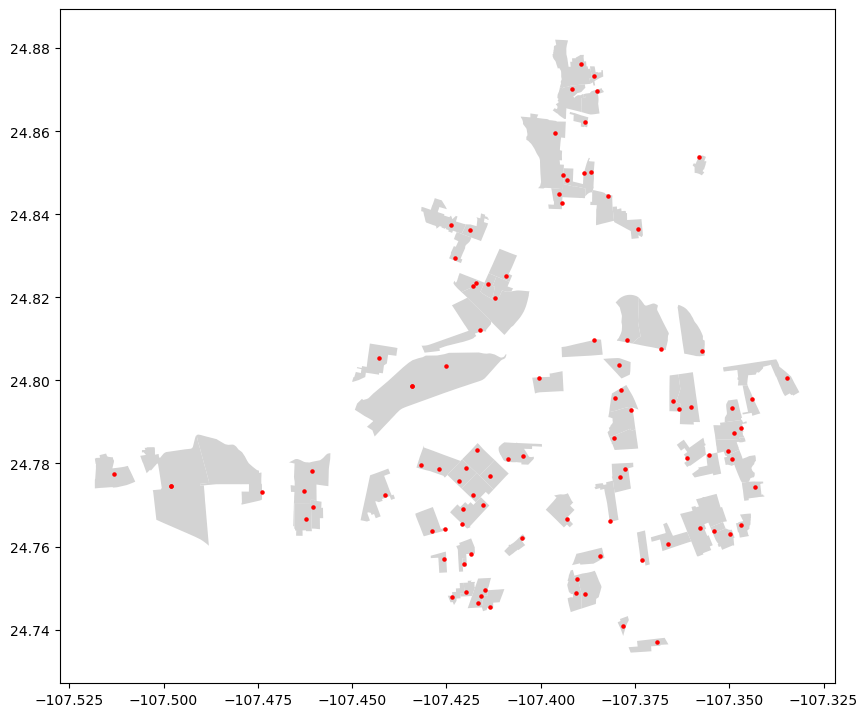

In [7]:
# Get a list of unique values of poly_idx. Eliminate duplicates and non-numbers
poly_list = [idx for idx in gdf2['poly_idx'].unique() if pd.notna(idx)]
# Plot the polygons listed in gdf2 in the column poly_idx
fig, ax = plt.subplots(figsize=(10, 10))
gdfs = gdf.iloc[poly_list]
gdfs.plot(ax=ax, color='lightgrey')
gdf2.plot(ax=ax, color='red', markersize=5)

In [8]:
# Select Name, CVE_AGEB, and poly_idx columns in a DataFrame
df = gdf2.drop(columns='geometry')
df.to_csv('AGEB_Nanostores.csv', index=False)
df.head()

,Nombre de la Unidad Económica,Nombre de asentamiento humano,Código Postal,Área geoestadística básica,Latitud,Longitud,poly_idx,CVE_AGEB
0,TIENDA DE ABARROTES,VILLA SATELITE,80088,1604,24.807097,-107.357217,180,1604
1,ABARROTES BARELAS,HUIZACHES,80298,3973,24.757707,-107.384245,603,3973
2,ABARROTES MELY,LOMAS DE RODRIGUERA,80019,3047,24.870104,-107.391630,252,3047
3,ABARROTES EVA,INFONAVIT HUMAYA,80020,3992,24.822760,-107.418068,317,3992
4,ABARROTES LETY,INDUSTRIAL EL PALMITO,80160,413,24.779739,-107.431670,127,0413


In [9]:
# Sort gdfs by OID and reset index to open shapefile with INEGI's software
gdfs = gdfs.sort_values(by='OID').reset_index(drop=True)
# Modify OID to list from 1 to len(gdfs)
gdfs['OID'] = gdfs.index + 1
gdfs.head()

,GUID,CVE_GEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,EDICION,VERSION,OID,geometry
0,153762303,250060001405A,25,006,0001,405A,2023,1,1,"POLYGON ((-107.40658 24.78491, -107.40641 24.7..."
1,153762424,2500600013329,25,006,0001,3329,2023,1,2,"POLYGON ((-107.40773 24.82151, -107.40778 24.8..."
2,153762453,2500600013333,25,006,0001,3333,2023,1,3,"POLYGON ((-107.40792 24.82447, -107.40828 24.8..."
3,153762708,2500600013155,25,006,0001,3155,2023,1,4,"POLYGON ((-107.35167 24.76593, -107.35256 24.7..."
4,153762228,2500600017410,25,006,0001,7410,2023,1,5,"POLYGON ((-107.3778 24.73959, -107.37781 24.73..."


In [11]:
# Save the shapefile
gdf2.to_file('Nanostores_SHP/nanostores_location.shp')
gdfs.to_file('Nanostores_SHP/nanostores_agebs.shp')

C:\Users\L01032102\AppData\Local\Temp\ipykernel_34620\1791066641.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf2.to_file('Nanostores_SHP/nanostores_location.shp')
c:\Users\L01032102\AppData\Local\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Nombre de la Unidad Económica' to 'Nombre de'
  ogr_write(
c:\Users\L01032102\AppData\Local\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Nombre de asentamiento humano' to 'Nombre d_1'
  ogr_write(
c:\Users\L01032102\AppData\Local\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Código Postal' to 'Código Po'
  ogr_write(
c:\Users\L01032102\AppData\Local\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Área geoestadística básica ' to 'Área geoe'
  ogr_write(
